In [1]:
import os

## count number of files

In [ ]:
def count_txt_files(directory):
    """
    Counts the number of .txt files in the specified directory.

    Args:
    directory (str): The path to the directory to search for .txt files.

    Returns:
    int: The number of .txt files in the directory.
    """
    txt_count = 0
    # List all files and directories in the specified directory
    for entry in os.listdir(directory):
        # Construct full path
        full_path = os.path.join(directory, entry)
        # Check if it's a file with a .txt extension
        if os.path.isfile(full_path) and entry.endswith('.txt'):
            txt_count += 1
    
    return txt_count


count = count_txt_files(output_folder)
print(f"There are {count} .txt files in the folder.")
count = count_png_files(output_folder)
print(f"There are {count} .png files in the folder.")

## check number of files and process when meet condition

In [ ]:
import os
import time

def wait_for_files(directory, target_count=40):
    """
    Continuously checks the directory until it contains at least target_count .txt files.

    Args:
    directory (str): The path to the directory to check.
    target_count (int): The minimum number of .txt files desired in the directory.
    """
    while True:
        count = count_txt_files(directory)
        print(f"Checking... There are currently {count} .txt files.")
        if count >= target_count:
            print(f"Reached target of {target_count} .txt files.")
            time.sleep(120)
            break
        time.sleep(20)  # Wait for 10 seconds before checking again

# # Example usage
# directory_path = 'saved_data/sd_turbo_500images_llava/'
# wait_for_files(directory_path)

## GPUs 

In [ ]:
torch.cuda.set_device(2)
if torch.cuda.is_available():
    current_gpu = torch.cuda.current_device()
    print(f"Current default GPU index: {current_gpu}")
    print(f"Current default GPU name: {torch.cuda.get_device_name(current_gpu)}")
else:
    print("No GPUs available.")

In [2]:
# plot images

In [3]:
## with tensor

In [4]:
def show_single(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_images_side_by_side(img_list):
    # Create a figure to contain the plots
    plt.figure(figsize=(15, 5))  # Increase the figure size as needed
    
    # Loop through the list of images
    for i, img in enumerate(img_list, 1):  # Start enumeration at 1
        npimg = img.numpy()  # Convert to numpy array if it's a tensor
        ax = plt.subplot(1, len(img_list), i)  # Create a subplot for each image
        plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Transpose dimensions
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_yticks([])  # Remove y-axis ticks
        
    plt.show() 

## with paths

In [11]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_images_from_classes(folder_path, classes, num_images=9, grid_size=(3, 3)):
    """
    Display a grid of images sampled from specific classes in a folder.

    Args:
    folder_path (str): Path to the folder containing images.
    classes (list): List of class names to include in the sampling.
    num_images (int): Number of images to sample and display.
    grid_size (tuple): Dimensions of the grid (rows, columns) for displaying images.
    """
    # Ensure the folder exists and is a directory
    if not os.path.isdir(folder_path):
        print("The specified path is not a valid directory.")
        return

    # Get all files in the directory and filter for image files that start with any of the specified class names
    all_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    filtered_files = [f for f in all_files if any(f.startswith(cls) for cls in classes) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

    # Randomly select files
    if len(filtered_files) < num_images:
        print(f"Not enough image files to sample from. Found only {len(filtered_files)} files.")
        return
    random.seed(42)
    sampled_files = random.sample(filtered_files, num_images)

    # Plot images in a grid
    fig, axes = plt.subplots(nrows=grid_size[0], ncols=grid_size[1], figsize=(15, 15))
    fig.suptitle('Sampled Images from Specific Classes', fontsize=16)

    for ax, image_file in zip(axes.flat, sampled_files):
        image_path = os.path.join(folder_path, image_file)
        img = mpimg.imread(image_path)
        ax.imshow(img)
        ax.axis('off')  # Hide axes
        ax.set_title(image_file.split('_')[0], fontsize=10, y=-0.15)  # Display the class part of the filename

    plt.tight_layout(pad=3.0)  # Adjust layout to make room for class labels
    plt.show()

    

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_image_from_path(image_path):
    # Load the image from the specified path
    img = mpimg.imread(image_path)
    
    # Create a plot to display the image
    plt.figure(figsize=(8, 6))  # Optionally specify the figure size
    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbering and ticks
    plt.show()

# # Specify the path to your image file
# image_path = 'path_to_your_image.jpg'  # Replace with your image file path

# # Call the function with the image path
# plot_image_from_path(image_path)


## plot equations

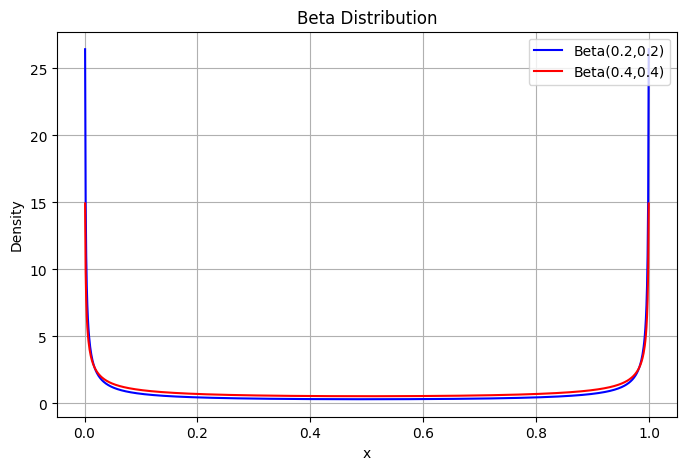

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the shape parameters for the Beta distribution
a = 0.2  # shape parameter a
b = 0.2  # shape parameter b

a2 = b2 = 0.4
# Generate a range of x values from 0 to 1
x = np.linspace(0, 1, 1000)

# Compute the probability density function (PDF) for each x value
y = beta.pdf(x, a, b)
y2 = beta.pdf(x, a2, b2)

# Create the plot
plt.figure(figsize=(8, 5))  # Set the figure size as desired
plt.plot(x, y, 'b-', label=f'Beta({a},{b})')  # Plot the Beta PDF with a blue line
plt.plot(x, y2, 'r-', label=f'Beta({a2},{b2})')  # Plot the Beta PDF with a blue line
plt.title(f'Beta Distribution')  # Add a title
plt.xlabel('x')  # Label the x-axis
plt.ylabel('Density')  # Label the y-axis
plt.grid(True)  # Add a grid for easier readability
plt.legend(loc='upper right')  # Add a legend to the upper right corner
plt.show()  # Display the plot


## combines two folders into a third

In [13]:
def copy_contents(src, dst):
    for item in os.listdir(src):
        src_path = os.path.join(src, item)
        dst_path = os.path.join(dst, item)

        if os.path.isdir(src_path):
            if not os.path.exists(dst_path):
                os.makedirs(dst_path)
            copy_contents(src_path, dst_path)  # Recursively copy subdirectories
        else:
            shutil.copy2(src_path, dst_path)  # Copy files

# copy_contents(folder1, destination_folder)
# copy_contents(folder2, destination_folder)

## combines txt files in two folders

In [16]:
         
                
def combine_class_txt_files(folder_path, folder_path2, output_folder):
    """
    Filters out images and text files for specified classes and copies them to a new directory.

    Args:
    image_folder (str): Path to the directory containing images.
    txt_folder (str): Path to the directory containing text files.
    output_folder (str): Path to the directory where filtered files should be stored.
    class_list (list): List of class numbers as strings.
    """
        
    
    os.makedirs(output_folder, exist_ok=True)

    file_list = os.listdir(folder_path) + os.listdir(folder_path2)

    for file in file_list:
        # Check if the file is an image or a text file for the classes in the list
        if file.endswith('.txt'):
            shutil.copy(os.path.join(folder_path, file), os.path.join(output_folder, file))

## combine specific txts files in two folders into a new folder

In [17]:
import os
import shutil

def filter_class_txt_files(folder_path, output_folder, specific_dict_integer_to_name, folder_path2 = None):
    """
    Filters out images and text files for specified classes and copies them to a new directory.

    Args:
    image_folder (str): Path to the directory containing images.
    txt_folder (str): Path to the directory containing text files.
    output_folder (str): Path to the directory where filtered files should be stored.
    class_list (list): List of class numbers as strings.
    """
    # Ensure output directory exists
    
    class_numbers = list(specific_dict_integer_to_name.keys())
    class_names = list(specific_dict_integer_to_name.values())
        
    
    os.makedirs(output_folder, exist_ok=True)
    if not folder_path2:
        file_list = os.listdir(folder_path)
    else:
        file_list = os.listdir(folder_path) + os.listdir(folder_path2)

    for file in file_list:
        # Check if the file is an image or a text file for the classes in the list
        if (file.endswith('.txt') and int(file.split('class')[1].split('.txt')[0]) in class_numbers):
            # Copy file to output directory
            if file in os.listdir(folder_path):
                shutil.copy(os.path.join(folder_path, file), os.path.join(output_folder, file))
            else:
                shutil.copy(os.path.join(folder_path2, file), os.path.join(output_folder, file))
       

## cifar classes, names

In [19]:
import torchvision

testset = torchvision.datasets.CIFAR100(root='data', train=False,
                                         download=False)
name_list = testset.classes

integer_to_name = {i: name for i, name in enumerate(name_list)}

integer_to_name[33]

## specific experience classes

In [21]:
benchmark = SplitCIFAR100(n_experiences=20,
                          seed = 41,             
                          )

orders = benchmark.classes_order
order_list = [orders[x:x+5] for x in range(0, len(orders), 5)]

order_sample = [order[3:] for order in order_list]
classname_list = []
label_list = []
classname_list_sep = []
for order_l in order_sample:
    label_list.append(order_l)
    cur_classname = [integer_to_name[i] for i in order_l]
    classname_list.append(cur_classname)
classname_list_sep = [item for lists in classname_list for item in lists]
label_list_sep = [item for lists in label_list for item in lists]
print('number of synthesis classes', len(label_list_sep))

real_list = set([i for i in range(100)]) - set(label_list_sep)

NameError: name 'SplitCIFAR100' is not defined

# generate txt file list for filelist benchmark

## combine files with numbers as names

In [ ]:
def combine_files_with_numbers(folder, file_initial, numbers, output_folder):
    """use to get the data with label in the training experience"""
    combined_content = ""  # Initialize an empty string to store combined content
    # Compile a set of filenames to look for, based on the list of numbers
    filenames_to_look_for = {file_initial + f"{number}.txt" for number in numbers}
    print(filenames_to_look_for)
    
    os.makedirs(output_folder, exist_ok=True)

    # Iterate over each file in the specified folder
#     files_found = 0
    
    for file in os.listdir(folder):
        # Check if the file name matches exactly any in our set of filenames to look for
        if file in filenames_to_look_for:
#             print(f'found file {file}')
            # Open and read the file, then add its content to the combined_content string
            with open(os.path.join(folder, file), 'r') as f:
                combined_content += f.read()  # Add a newline character after each file's content for better separation
#                 print(combined_content)

    joined_string = '_'.join(str(integer) for integer in numbers)


    output_file_path = os.path.join(output_folder, f"{file_initial}combined_{joined_string}.txt")
    print(output_file_path)
    with open(output_file_path, 'w') as f:
        f.write(combined_content)


In [ ]:
target_folder = aaaa

train_experience_list = []
for l in order_list:
    combine_files_with_numbers(
                target_folder,
                'class',
                l,
                target_folder + '_combined/')
    
    joined_string = '_'.join(str(integer) for integer in l)
    output_folder = target_folder + '_combined/'
    file_initial = 'class'
    output_file_path = output_folder +file_initial+ 'combined' + '_' + joined_string + '.txt' 
    train_experience_list.append(output_file_path)

    
test_experience_list = []
for l in order_list:
    combine_files_with_numbers(
                'saved_data/cifar_test100',
                'class',
                l,
                'saved_data/cifar_test100' + '_combined/')
    
    joined_string = '_'.join(str(integer) for integer in l)
    output_folder = 'saved_data/cifar_test100' + '_combined/'
    file_initial = 'class'
    output_file_path = output_folder +file_initial+ 'combined' + '_' + joined_string + '.txt' 
    test_experience_list.append(output_file_path)


In [ ]:
sythesis_cifar_benchmark =  filelist_benchmark(
                                None,
                                train_file_lists = train_experience_list, # train
                                test_file_lists = test_experience_list, # test
                                task_labels = [0]*20,
                                # complete_test_set_only=True,
                                train_transform=transform_train,
                            eval_transform=transform_train
                            )

In [ ]:
train_stream = sythesis_cifar_benchmark.train_stream
for experience in train_stream:
    t = experience.task_label
    exp_id = experience.current_experience
    training_dataset = experience.dataset
    print('Task {} batch {} -> train'.format(t, exp_id))
    print('This batch contains', len(training_dataset), 'patterns')
    print(f'This contains labels {experience.classes_in_this_experience}')

# results from logs

## extract and plot task

In [ ]:
def parse_log_file2(log_file_path):
    # Dictionary to store the individual accuracy values for each task and the average accuracy
    task_accuracies = {"individual": {}, "average": {}}
    current_task = 0  # Start with task 0

    # Open the log file and read line by line
    with open(log_file_path, 'r') as file:
        for line in file:
            line = line.strip()

            # Check for the start of a new task's training phase
            if line == '-- >> Start of training phase << --':
                current_task += 1  # Increment task number at the start of a new training phase
                task_accuracies["individual"][current_task-1] = []  # Initialize the list for the new task

            # Extract accuracy values during task training
            if 'Top1_Acc_Exp/eval_phase/test_stream/' in line:
                # Parse the accuracy value from the line
                accuracy = float(line.split('=')[1].strip())
                # Append the accuracy value to the current task's list
                task_accuracies["individual"][current_task-1].append(accuracy)

            # Extract the last average accuracy value after each task
            if line.startswith('Top1_Acc_Stream/eval_phase/test_stream/'):
                # Parse the accuracy value from the line
                accuracy = float(line.split('=')[1].strip())
                # Store this accuracy in the 'average' key for the corresponding task
                task_accuracies["average"][current_task] = accuracy

    return task_accuracies


In [ ]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def plot_task_accuracies_task(task_accuracies, saved_name):
    task_accuracies = task_accuracies['individual']
    # Set up a figure with a grid of subplots
    fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))  # 4x5 grid of plots
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    axes = axes.flatten()  # Flatten to 1D array for easier iteration

    # Iterate over each task and its corresponding accuracies
    for i in range(20):  # Assuming there are 20 tasks, indexed 0 to 19
        ax = axes[i]
        task_data = []
        
        # Initialize the list with None for tasks 0 to i-1
        task_data = [None] * 20  # Pre-fill with None for clarity

        # Gather accuracies for the current task from all tasks' evaluations
        for task_trained in range(i, 20):  # Start collecting data from the current task onward
            if task_trained in task_accuracies and len(task_accuracies[task_trained]) > i:
                task_data[task_trained] = task_accuracies[task_trained][i]
        
        # Filter data to remove leading None values if all are None before first non-None value
        if any(v is not None for v in task_data):
            # Plot the accuracies
            x_values = list(range(20))
            ax.plot(x_values, task_data, marker='o', linestyle='-', label=f'Task {i}')
            ax.set_title(f'Task {i} Accuracies')
            ax.set_xlabel('Tasks Trained')
            ax.set_ylabel('Accuracy')
            ax.set_ylim([0, 1])
            ax.set_xlim([0, 19])
            ax.grid(True)
#             ax.legend()
    plt.savefig(saved_name)
    plt.show()

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def plot_dual_task_accuracies(task_accuracies1, task_accuracies2, saved_name):
    task_accuracies1 = task_accuracies1['individual']
    task_accuracies2 = task_accuracies2['individual']
    
    # Set up a figure with a grid of subplots
    fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))  # 4x5 grid of plots
    fig.subplots_adjust(hspace=0.5, wspace=0.3, bottom=0.1)  # Adjust the bottom to make space for the legend
    axes = axes.flatten()  # Flatten to 1D array for easier iteration

    # Iterate over each task and its corresponding accuracies
    for i in range(20):  # Assuming there are 20 tasks, indexed 0 to 19
        ax = axes[i]
        task_data1 = [None] * 20
        task_data2 = [None] * 20

        # Gather accuracies for the current task from all tasks' evaluations
        for task_trained in range(i, 20):
            if task_trained in task_accuracies1 and len(task_accuracies1[task_trained]) > i:
                task_data1[task_trained] = task_accuracies1[task_trained][i]
            if task_trained in task_accuracies2 and len(task_accuracies2[task_trained]) > i:
                task_data2[task_trained] = task_accuracies2[task_trained][i]
                
        # Plot the accuracies
        x_values = list(range(20))
        ax.plot(x_values, task_data1, marker='o', linestyle='-', color='red', label='with budget')
        ax.plot(x_values, task_data2, marker='o', linestyle='-', color='blue', label='without budget')
        
        ax.set_title(f'Task {i} Accuracies')
        ax.set_xlabel('Tasks Trained')
        ax.set_ylabel('Accuracy')
        ax.set_ylim([0, 1])
        ax.set_xlim([0, 19])
        ax.grid(True)

    # Add an overall figure title and a legend below the plots
#     fig.suptitle('Comparison of Task Accuracies', fontsize=16)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=2, fontsize='large')

    plt.savefig(saved_name)
    plt.show()


# Path to the log file
log_file_path1 = ''

# Parse the log file and get the accuracies dictionary
accuracies1 = parse_log_file2(log_file_path1)

# log_file_path2 = 'logs/method2_10buffer.txt'
# accuracies2 = parse_log_file2(log_file_path2)
# print(accuracies2)

plot_dual_task_accuracies(accuracies1, accuracies2, '')

In [ ]:
def plot_task_accuracies_average(task_accuracies, saved_name):
    acc = task_accuracies['average']
    acc = list(acc.values())
    
    plt.figure(figsize=(5, 4))
    plt.plot(acc, marker='o', linestyle='-')
    plt.title('Average accuracy')
    plt.xlabel('Task')
    plt.ylabel('Accuracy')
    plt.xlim(left=-0.5) 
    plt.ylim(0, 1)
#     plt.legend()
    plt.grid(True)
    plt.xticks(range(0, 20))
    
    plt.savefig(saved_name)
    plt.show()

## extract and plot class

In [ ]:
def parse_log_file_class(file_path):
    # Initialize a dictionary to hold the accuracy list for each class
    class_accuracies = {i: [] for i in range(100)}  # Assuming 100 classes

    # Regular expression to match the accuracy entries
    pattern = re.compile(r"Top1_ClassAcc_Stream/eval_phase/test_stream/Task000/(\d+) = (\d+\.\d+)")

    with open(file_path, 'r') as file:
        # Read the file line by line
        for line in file:
            line = line.strip()
            # Check for a match to the pattern
            match = pattern.match(line)
            if match:
                class_id, accuracy = match.groups()
                class_id = int(class_id)
                accuracy = float(accuracy)
                # Append the accuracy to the corresponding class' list
                class_accuracies[class_id].append(accuracy)

    return class_accuracies

def truncate_class_accuracies(class_accuracies, task_class_dict):
    # Find the first appearance of each class
    first_appearance = {cls: None for cls in range(100)}  # Assuming 100 classes

    for task, classes in task_class_dict.items():
        for cls in classes:
            if first_appearance[cls] is None:
                first_appearance[cls] = task

    # Truncate the accuracy lists based on the first appearance
    truncated_accuracies = {}
    for cls, accuracies in class_accuracies.items():
        start_task = first_appearance[cls]
        if start_task is not None:
            truncated_accuracies[cls] = accuracies[start_task:]
        else:
            truncated_accuracies[cls] = []

    return truncated_accuracies


import matplotlib.pyplot as plt

def plot_class_accuracies(class_accuracies, task_class_dict, saved_name):
    # Set up a figure with a grid of subplots for the 100 classes
    fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    axes = axes.flatten()

    # Initialize the first appearance for each class
    first_appearance = {cls: None for cls in range(100)}
    for task, classes in task_class_dict.items():
        for cls in classes:
            if first_appearance[cls] is None:
                first_appearance[cls] = task

    # Iterate over each class and plot their accuracies
    for cls in range(100):
        ax = axes[cls]
        if cls in class_accuracies:
            accuracies = class_accuracies[cls]
            task_indices = list(range(first_appearance[cls], first_appearance[cls] + len(accuracies)))
            ax.plot(task_indices, accuracies, marker='o', linestyle='-', color='b', label=f'Class {cls}')
            ax.set_ylim([0, 1])
            ax.set_xlim([0, 20])
            ax.set_title(f'Class {cls}')
            ax.set_xlabel('Task Index')
            ax.set_ylabel('Accuracy')
            ax.grid(True)
        else:
            ax.set_title(f'Class {cls}')
            ax.set_xlabel('Task Index')
            ax.set_ylabel('Accuracy')
            ax.set_ylim([0, 1])
            ax.set_xlim([0, 20])
            ax.grid(True)

    # Save the plot to a file
    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.savefig(saved_name)
    plt.show()

    
    import matplotlib.pyplot as plt

def plot_class_accuracies_mixdata(class_accuracies, task_class_dict, saved_name, highlight_classes):
    """
    Plots class accuracies with highlighted classes in a different color.

    :param class_accuracies: Dictionary with class keys and list of accuracies as values.
    :param task_class_dict: Dictionary mapping task index to classes appearing in that task.
    :param saved_name: Filename to save the plot.
    :param highlight_classes: List of classes to highlight in a different color.
    """
    # Set up a figure with a grid of subplots for the 100 classes
    fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    axes = axes.flatten()

    # Initialize the first appearance for each class
    first_appearance = {cls: None for cls in range(100)}
    for task, classes in task_class_dict.items():
        for cls in classes:
            if first_appearance[cls] is None:
                first_appearance[cls] = task

    # Define colors
    default_color = 'b'  # Default color for normal classes
    highlight_color = 'r'  # Color for highlighted classes

    # Iterate over each class and plot their accuracies
    for cls in range(100):
        ax = axes[cls]
        if cls in class_accuracies:
            accuracies = class_accuracies[cls]
            task_indices = range(first_appearance[cls], first_appearance[cls] + len(accuracies))
            color = highlight_color if cls in highlight_classes else default_color
            ax.plot(task_indices, accuracies, marker='o', linestyle='-', color=color, label=f'Class {cls}')
            ax.set_ylim([0, 1])
            ax.set_xlim([0, 20])
            ax.set_title(f'Class {cls}')
            ax.set_xlabel('Task Index')
            ax.set_ylabel('Accuracy')
            ax.grid(True)
        else:
            ax.set_title(f'Class {cls}')
            ax.set_xlabel('Task Index')
            ax.set_ylabel('Accuracy')
            ax.set_ylim([0, 1])
            ax.set_xlim([0, 20])
            ax.grid(True)

    # Save the plot to a file
    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.savefig(saved_name)
    plt.show()

    def plot_class_accuracies_comparison(class_accuracies1, class_accuracies2, task_class_dict, saved_name):
    # Set up a figure with a grid of subplots for the 100 classes
    fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    axes = axes.flatten()

    # Initialize the first appearance for each class
    first_appearance = {cls: None for cls in range(100)}
    for task, classes in task_class_dict.items():
        for cls in classes:
            if first_appearance[cls] is None:
                first_appearance[cls] = task

    # Plot accuracies for each class from both configurations
    for cls in range(100):
        ax = axes[cls]
        if cls in class_accuracies1 and cls in class_accuracies2:
            accuracies1 = class_accuracies1[cls]
            accuracies2 = class_accuracies2[cls]
            task_indices = list(range(first_appearance[cls], first_appearance[cls] + len(accuracies1)))

            # Ensure full range from 0 to 19 for x-axis, even if not all tasks have data
            full_range_accuracies1 = [None]*20
            full_range_accuracies2 = [None]*20
            for i, idx in enumerate(task_indices):
                full_range_accuracies1[idx] = accuracies1[i]
                full_range_accuracies2[idx] = accuracies2[i]

            ax.plot(range(20), full_range_accuracies1, marker='o', linestyle='-', color='red', label='llava prompt')
            ax.plot(range(20), full_range_accuracies2, marker='o', linestyle='-', color='blue', label='base prompt')

        ax.set_ylim([0, 1])
        ax.set_xlim([0, 20])
        ax.set_title(f'Class {cls}')
        ax.set_xlabel('Task Index')
        ax.set_ylabel('Accuracy')
        ax.grid(True)

    # Add a single legend for the whole figure
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=2, fontsize='large')

    # Save the plot to a file
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for legend
    plt.savefig(saved_name)
    plt.show()

In [ ]:
class_accuracies2 = parse_log_file_class('logs/log_real_sythesis_baseprompt_class.txt')
dict_test2 = class_accuracies2
outcome2 = truncate_class_accuracies(dict_test2, task2class)
plot_class_accuracies(outcome2, task2class,'figures/log_real_sythesis_baseprompt_class.png')


## calculate real and synthesis class accuracy

In [25]:
def extract_class_accuracy_from_file(file_path, last_n_lines=None):
    """
    Extracts class numbers and their corresponding accuracies from the last few lines of a text file.
    
    Args:
    file_path (str): Path to the text file.
    last_n_lines (int): Number of lines from the end of the file to read. If None, reads the entire file.
    
    Returns:
    dict: A dictionary with class numbers as keys and accuracies as values.
    """
    class_accuracy_dict = {}
    try:
        with open(file_path, 'r') as file:
            if last_n_lines is not None:
                # Seek to the end of the file and read last_n_lines
                lines = file.readlines()[-last_n_lines:]
            else:
                # Read all lines in the file
                lines = file.readlines()

            for line in lines:
                # Process each line as before
                parts = line.split(' = ')
                if len(parts) == 2:
                    class_number = parts[0].split('/')[-1]
                    accuracy = float(parts[1])
                    class_accuracy_dict[int(class_number)] = accuracy
    except Exception as e:
        print(f"Error reading from file: {e}")
    
    return class_accuracy_dict


def filter_class_dict(full_dict, class_list):
    """
    Filters a dictionary to include only specific keys (class numbers) present in a given list.

    Args:
    full_dict (dict): The original dictionary containing class numbers as keys and associated values.
    class_list (list): A list of class numbers to retain in the new dictionary.

    Returns:
    dict: A filtered dictionary containing only the keys and values for class numbers in the class_list.
    """
    # Use dictionary comprehension to filter the dictionary
    filtered_dict = {class_number: full_dict[class_number] for class_number in class_list if class_number in full_dict}
    return filtered_dict


# Example usage
file_path = 'logs/log_real_sythesis_mixup.txt'
accuracy_dict = extract_class_accuracy_from_file(file_path, last_n_lines=100)  # Adjust last_n_lines as needed
print(accuracy_dict)

## unzip and consolidate folders

In [5]:
import zipfile
import os
import shutil

def unzip_and_consolidate(zip_files, destination_folder):
    """
    Unzip multiple zip files and consolidate their contents into a single destination folder.

    :param zip_files: List of paths to zip files.
    :param destination_folder: Path to the destination folder.
    """
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    for zip_file in zip_files:
        with zipfile.ZipFile(zip_file, 'r') as zip_ref:
            zip_ref.extractall(destination_folder)
    
    # Optional: Move all subfolders to the root of the destination folder
    for root, dirs, files in os.walk(destination_folder):
        for dir_name in dirs:
            src_dir = os.path.join(root, dir_name)
            dst_dir = os.path.join(destination_folder, dir_name)
            if src_dir != dst_dir:
                shutil.move(src_dir, dst_dir)
        break  # We only need the top-level folders


zip_files = [
#         'saved_data/train.X1.zip',
#         'saved_data/train.X2.zip',
#         'saved_data/train.X3.zip',
#         'saved_data/train.X4.zip',
        'saved_data/val.X.zip',
    ]
    
    # Destination folder where all subfolders will be consolidated
destination_folder = 'saved_data/ImageNet_val'

unzip_and_consolidate(zip_files, destination_folder)


## count number of subfolders

In [12]:
import os

def count_subfolders(folder_path):
    """
    Count the number of subfolders in the given folder.

    :param folder_path: Path to the folder.
    :return: Number of subfolders.
    """
    if not os.path.exists(folder_path):
        print(f"The folder {folder_path} does not exist.")
        return 0

    subfolder_count = 0
    for entry in os.scandir(folder_path):
        if entry.is_dir():
            subfolder_count += 1

    return subfolder_count


folder_path = 'saved_data/ImageNet_train_10percent'

num_subfolders = count_subfolders(folder_path)
print(f"The number of subfolders in '{folder_path}' is: {num_subfolders}")


The number of subfolders in 'saved_data/ImageNet_train_10percent' is: 100


In [11]:
import os

def count_images_in_subfolders(folder_path):
    """
    Count the number of image files in each subfolder of the given folder.

    :param folder_path: Path to the folder.
    """
    if not os.path.exists(folder_path):
        print(f"The folder {folder_path} does not exist.")
        return

    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.tif')
    subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]

    for subfolder in subfolders:
        image_count = 0
        for root, dirs, files in os.walk(subfolder):
            image_count += len([file for file in files if file.lower().endswith(image_extensions)])
        
        print(f"Subfolder: {os.path.basename(subfolder)} - Number of images: {image_count}")


    # Folder path where you want to count images in subfolders
folder_path = 'saved_data/ImageNet_train_10percent'

count_images_in_subfolders(folder_path)


Subfolder: n01440764 - Number of images: 130
Subfolder: n01484850 - Number of images: 130
Subfolder: n01494475 - Number of images: 130
Subfolder: n01531178 - Number of images: 130
Subfolder: n01632777 - Number of images: 130
Subfolder: n01665541 - Number of images: 130
Subfolder: n01687978 - Number of images: 130
Subfolder: n01695060 - Number of images: 130
Subfolder: n01749939 - Number of images: 130
Subfolder: n01775062 - Number of images: 130
Subfolder: n01795545 - Number of images: 130
Subfolder: n01818515 - Number of images: 130
Subfolder: n01820546 - Number of images: 130
Subfolder: n01824575 - Number of images: 130
Subfolder: n01833805 - Number of images: 130
Subfolder: n01914609 - Number of images: 130
Subfolder: n01924916 - Number of images: 130
Subfolder: n01930112 - Number of images: 130
Subfolder: n01950731 - Number of images: 130
Subfolder: n01978455 - Number of images: 130
Subfolder: n01984695 - Number of images: 130
Subfolder: n02007558 - Number of images: 130
Subfolder:

In [ ]:
import os
import random
import shutil

def sample_images(src_folder, dest_folder, sample_percentage=0.1, seed=42):
    """
    Sample a percentage of images from each subfolder and save them into subfolders
    with the same name in another folder.

    :param src_folder: Path to the source folder containing subfolders with images.
    :param dest_folder: Path to the destination folder to save the sampled images.
    :param sample_percentage: Percentage of images to sample from each subfolder (default is 0.1 for 10%).
    :param seed: Seed for the random number generator to ensure reproducibility (default is 42).
    """
    if not os.path.exists(src_folder):
        print(f"The source folder {src_folder} does not exist.")
        return

    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)

    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.tif')
    
    # Set the random seed
    random.seed(seed)
    
    for subdir in os.scandir(src_folder):
        if subdir.is_dir():
            subdir_name = subdir.name
            src_subdir_path = subdir.path
            dest_subdir_path = os.path.join(dest_folder, subdir_name)

            if not os.path.exists(dest_subdir_path):
                os.makedirs(dest_subdir_path)

            # Get all image files in the subfolder
            all_images = [file for file in os.listdir(src_subdir_path) if file.lower().endswith(image_extensions)]
            total_images = len(all_images)

            # Calculate the number of images to sample
            sample_size = max(1, int(total_images * sample_percentage))

            # Sample the images
            sampled_images = random.sample(all_images, sample_size)

            # Copy sampled images to the destination subfolder
            for image in sampled_images:
                src_image_path = os.path.join(src_subdir_path, image)
                dest_image_path = os.path.join(dest_subdir_path, image)
                shutil.copy(src_image_path, dest_image_path)

            print(f"Sampled {sample_size} images from {src_subdir_path} to {dest_subdir_path}")




In [16]:
import json
import os

def load_json(file_path):
    """
    Load a JSON file and return the data.

    :param file_path: Path to the JSON file.
    :return: Parsed JSON data.
    """
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

def process_labels(json_data):
    """
    Process the labels from the JSON data.

    :param json_data: The JSON data containing labels and class names.
    """
    for identifier, class_name in json_data.items():
        print(f"ID: {identifier}, Class Name: {class_name}")
        
# Path to the JSON file
json_file_path = 'saved_data/Labels.json'

if not os.path.exists(json_file_path):
    print(f"The file {json_file_path} does not exist.")
else:
    # Load and process the JSON file
    json_data = load_json(json_file_path)
    process_labels(json_data)


ID: n01968897, Class Name: chambered nautilus, pearly nautilus, nautilus
ID: n01770081, Class Name: harvestman, daddy longlegs, Phalangium opilio
ID: n01818515, Class Name: macaw
ID: n02011460, Class Name: bittern
ID: n01496331, Class Name: electric ray, crampfish, numbfish, torpedo
ID: n01847000, Class Name: drake
ID: n01687978, Class Name: agama
ID: n01740131, Class Name: night snake, Hypsiglena torquata
ID: n01537544, Class Name: indigo bunting, indigo finch, indigo bird, Passerina cyanea
ID: n01491361, Class Name: tiger shark, Galeocerdo cuvieri
ID: n02007558, Class Name: flamingo
ID: n01735189, Class Name: garter snake, grass snake
ID: n01630670, Class Name: common newt, Triturus vulgaris
ID: n01440764, Class Name: tench, Tinca tinca
ID: n01819313, Class Name: sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita
ID: n02002556, Class Name: white stork, Ciconia ciconia
ID: n01667778, Class Name: terrapin
ID: n01755581, Class Name: diamondback, diamondback rattlesnake, Crotal

In [18]:
import os

def generate_image_paths_and_labels(big_folder):
    """
    Generate .txt files for each subfolder in the big folder, recording the path to images and their labels.

    :param big_folder: Path to the big folder containing subfolders with images.
    """
    if not os.path.exists(big_folder):
        print(f"The folder {big_folder} does not exist.")
        return

    for subdir in os.scandir(big_folder):
        if subdir.is_dir():
            subdir_name = subdir.name
            subdir_path = subdir.path
            txt_file_path = os.path.join(big_folder, f"{subdir_name}.txt")

            with open(txt_file_path, 'w') as txt_file:
                for root, dirs, files in os.walk(subdir_path):
                    for file in files:
                        image_path = os.path.join(big_folder, subdir_name, file)  # Relative path
                        label = subdir_name
                        txt_file.write(f"{image_path} {label}\n")
            print(f"Generated file: {txt_file_path}")


big_folder_path = 'saved_data/ImageNet_train'

generate_image_paths_and_labels(big_folder_path)


Generated file: saved_data/ImageNet_train/n01440764.txt
Generated file: saved_data/ImageNet_train/n01484850.txt
Generated file: saved_data/ImageNet_train/n01494475.txt
Generated file: saved_data/ImageNet_train/n01531178.txt
Generated file: saved_data/ImageNet_train/n01632777.txt
Generated file: saved_data/ImageNet_train/n01665541.txt
Generated file: saved_data/ImageNet_train/n01687978.txt
Generated file: saved_data/ImageNet_train/n01695060.txt
Generated file: saved_data/ImageNet_train/n01749939.txt
Generated file: saved_data/ImageNet_train/n01775062.txt
Generated file: saved_data/ImageNet_train/n01795545.txt
Generated file: saved_data/ImageNet_train/n01818515.txt
Generated file: saved_data/ImageNet_train/n01820546.txt
Generated file: saved_data/ImageNet_train/n01824575.txt
Generated file: saved_data/ImageNet_train/n01833805.txt
Generated file: saved_data/ImageNet_train/n01914609.txt
Generated file: saved_data/ImageNet_train/n01924916.txt
Generated file: saved_data/ImageNet_train/n01930

In [2]:
import json
import os

def create_directory_if_not_exists(file_path):
    """
    Create the directory for the given file path if it does not exist.

    :param file_path: Path to the file.
    """
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

def generate_new_label_mappings(input_file, output_file1, output_file2):
    """
    Generate new label mappings from the original JSON file and save them to two new JSON files.

    :param input_file: Path to the original JSON file.
    :param output_file1: Path to the first new JSON file (previous label: new label).
    :param output_file2: Path to the second new JSON file (new label: name).
    """
    if not os.path.exists(input_file):
        print(f"The file {input_file} does not exist.")
        return

    # Load the original JSON file
    with open(input_file, 'r') as file:
        original_data = json.load(file)

    # Create mappings
    previous_to_new = {}
    new_to_name = {}

    for new_label, (previous_label, name) in enumerate(original_data.items()):
        previous_to_new[previous_label] = new_label
        new_to_name[new_label] = name

    # Ensure directories exist
    create_directory_if_not_exists(output_file1)
    create_directory_if_not_exists(output_file2)

    # Save the new mappings to JSON files
    with open(output_file1, 'w') as file:
        json.dump(previous_to_new, file, indent=4)
    
    with open(output_file2, 'w') as file:
        json.dump(new_to_name, file, indent=4)
    
    print(f"Generated files: {output_file1}, {output_file2}")
    
    
# Path to the original JSON file
input_file_path = 'saved_data/Labels.json'

# Paths to the new JSON files
output_file1_path = 'saved_data/ImageNet/imagenet_previous_to_new_labels.json'
output_file2_path = 'saved_data/ImageNet/imagenet_new_labels_to_names.json'

generate_new_label_mappings(input_file_path, output_file1_path, output_file2_path)


Generated files: saved_data/ImageNet/imagenet_previous_to_new_labels.json, saved_data/ImageNet/imagenet_new_labels_to_names.json
